## Transfered Learning with fast.ai

In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
from fastai.vision import *

### Load Dataset

In [7]:
path = Path('data/hymenoptera_data')
path.ls()

[PosixPath('data/hymenoptera_data/train'),
 PosixPath('data/hymenoptera_data/val')]

In [37]:
# data transformations
tfms = get_transforms(do_flip=False)

data = (ImageList.from_folder(path)
       .split_by_folder()
       .label_from_folder()
       .transform(tfms, size=256)
       .databunch())


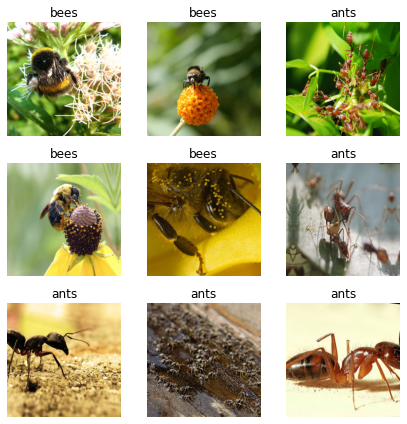

In [39]:
data.show_batch(3, figsize=(6,6), hide_axis=True)

In [40]:
data.classes

['ants', 'bees']

In [41]:
len(data.train_ds)

245

In [42]:
len(data.valid_ds)

153

### Train model

In [43]:
# Transfered learning

learn = cnn_learner(
    data,
    models.resnet50,
    metrics=accuracy
)

In [44]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,time
0,0.635006,0.849476,0.784314,02:44
1,0.395877,0.311442,0.921569,02:38
2,0.271680,0.313394,0.921569,02:31
3,0.234476,0.286963,0.934641,02:28


In [45]:
learn.save('ant_bees_v0.1')

In [ ]:
learn.unfreeze()
learn.lr_find()

In [ ]:
learn.recorder.plot()